In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.pipeline import Pipeline
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('max_rows',50000)
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold, GridSearchCV

[nltk_data] Downloading package stopwords to /Users/niall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/niall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def get_data():
    input_file = './Sarcasm_Headlines_Dataset.json'
    data = list(parseJson(input_file))

    df = pd.DataFrame(data)
    df = df[['is_sarcastic','headline']]
    df = shuffle(df)
    
    df['headline'] = df.headline.apply(to_lower)
    df['headline'] = df.headline.apply(punctuation_stp_words_lemmatize)
    count_vectorizer = CountVectorizer(analyzer ='word', encoding= 'utf-8', decode_error = 'ignore', strip_accents='ascii')
    X = count_vectorizer.fit_transform(df['headline'])
    X = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())
    y = df['is_sarcastic']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    return X_train, X_test, y_train, y_test

In [9]:
table = str.maketrans('', '', string.punctuation)
lemmatizer = WordNetLemmatizer() 
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

def to_lower(inp):
    return inp.lower()

def punctuation_lemmatize(inp):
    words = inp.split()
    stripped = [w.translate(table) for w in words]
    stripped = [w for w in stripped if len(w) > 1]
    stripped = [ lemmatizer.lemmatize(w) for w in stripped]    
    return ' '.join(stripped)

def punctuation_stp_words_lemmatize(inp):
    words = inp.split()
    stripped = [w.translate(table) for w in words]
    stripped = [w for w in stripped if len(w) > 1]
    stripped = [w for w in stripped if not w in stop_words]
    stripped = [ lemmatizer.lemmatize(w) for w in stripped]    
    return ' '.join(stripped)

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(min_df = 2,max_df = 1.0).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def roc_curve_plot(nb_probs):
    fpr, tpr, _ = roc_curve(y_test, nb_probs)
    pyplot.plot(fpr, tpr, marker='.', label='ROC Curve')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()
    
def print_auc_score(nb_probs):
    auc = roc_auc_score(Y_test, nb_probs)
    print('AUC: ', auc)
    
def model_analysis(model, model_name, preds, nb_probs):
    average_precision = average_precision_score(y_test, preds)
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))
    print(model_name , ' accuracy score: ' , accuracy_score(y_test, preds))
    print(model_name , ' precision score: ' , precision_score(y_test, preds))
    print(model_name , ' recall score: ' , recall_score(y_test, preds))
    print(model_name , ' average precision-recall score: ' + average_precision)
    
    disp = plot_precision_recall_curve(model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [10]:
sarcasm_headline_data = get_data()

In [11]:
X_train = sarcasm_headline_data[0]
X_test = sarcasm_headline_data[1]
y_train = sarcasm_headline_data[2]
y_test = sarcasm_headline_data[3]

In [12]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21464, 25860) (21464,)
(7155, 25860) (7155,)


In [14]:
train_tmp = X_train
train_tmp['is_sarcastic'] = y_train
train_tmp.head()

,00000000001,00003,02,03,10,100,1000,10000,100000,1000000,...,zoolander,zoologist,zoomed,zoroastrianism,zsa,zucker,zuckerberg,zuckerbergs,zz,is_sarcastic
28580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
14354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
19070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
24640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## All Headlines

In [15]:
all_words = pd.DataFrame(train_tmp.sum()).sort_values(0, ascending=False).head(20).reset_index()
all_words.columns = ['Word', 'Frequency']
all_words = all_words.astype({"Frequency": int})

In [16]:
all_words = all_words.iloc[1:]
all_words[:20]

,Word,Frequency
1,trump,1314
2,new,1260
3,man,1141
4,woman,718
5,say,532
6,report,517
7,get,462
8,day,447
9,one,427
10,time,419


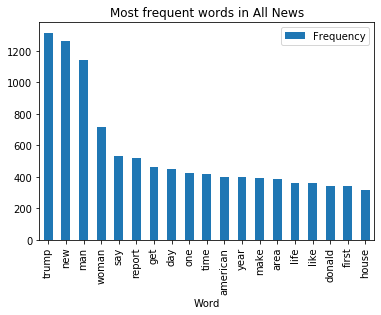

In [17]:
all_words.plot(kind='bar',x='Word',title='Most frequent words in All News')

In [18]:
sarcastic_words = pd.DataFrame(train_tmp[train_tmp['is_sarcastic'] == 1].sum()).sort_values(0, ascending=False).head(21).reset_index()
sarcastic_words = sarcastic_words[sarcastic_words['index'] !='is_sarcastic']
sarcastic_words.columns = ['Word', 'Frequency']
sarcastic_words = sarcastic_words.astype({"Frequency": int})

In [19]:
non_sarcastic_words = pd.DataFrame(train_tmp[train_tmp['is_sarcastic'] == 0].sum()).sort_values(0, ascending=False).head(20).reset_index()
non_sarcastic_words.columns = ['Word', 'Frequency']
non_sarcastic_words = non_sarcastic_words.astype({"Frequency": int})

## Sarcastic Headlines

In [20]:
sarcastic_words[:20]

,Word,Frequency
1,new,466
2,trump,458
3,man,412
4,woman,270
5,day,185
6,report,174
7,say,172
8,one,158
9,get,158
10,like,146


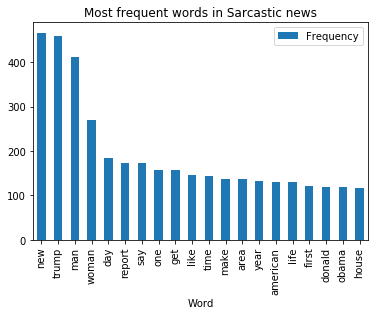

In [21]:
sarcastic_words.plot(kind='bar',x='Word',title='Most frequent words in Sarcastic news')

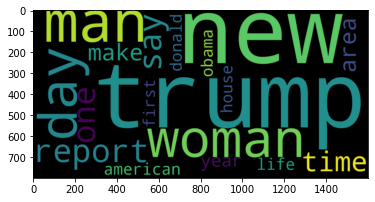

In [22]:
wc_sar = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sarcastic_words.Word))
plt.imshow(wc_sar , interpolation = 'bilinear')

## Non Sarcastic Headlines

In [27]:
non_sarcastic_words[:20]

,Word,Frequency
0,trump,500
1,new,475
2,man,449
3,woman,271
4,report,216
5,say,213
6,get,182
7,time,174
8,one,173
9,year,163


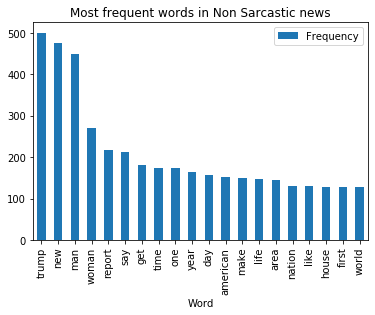

In [28]:
non_sarcastic_words.plot(kind='bar',x='Word',title='Most frequent words in Non Sarcastic news')

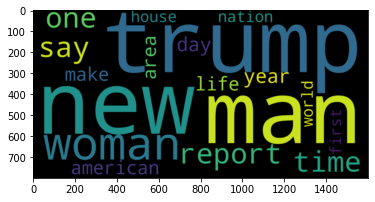

In [29]:
wc_non_sar = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(non_sarcastic_words.Word))
plt.imshow(wc_non_sar , interpolation = 'bilinear')